In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# define column names for easy indexing
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)] 
col_names = index_names + setting_names + sensor_names

# read data
train = pd.read_csv('train_FD001.txt', sep='\s+', header=None, names=col_names)
test = pd.read_csv('test_FD001.txt', sep='\s+', header=None, names=col_names)
y_test = pd.read_csv('RUL_FD001.txt', sep='\s+', header=None, names=['RUL'])

train.head()


,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [4]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()
    
    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)
    
    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life
    
    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

train = add_remaining_useful_life(train)
train[index_names+['RUL']].head()

,unit_nr,time_cycles,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187


In [5]:
drop_labels = index_names+setting_names
#dropping the columns except the sensor datas
X_train = train.drop(drop_labels, axis=1)
y_train = X_train.pop('RUL')

In [6]:
X_test = test.groupby('unit_nr').last().reset_index().drop(drop_labels, axis=1)

In [8]:
X_test

,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,518.67,642.58,1581.22,1398.91,14.62,21.61,554.42,2388.08,9056.40,1.3,...,521.79,2388.06,8130.11,8.4024,0.03,393,2388,100.0,38.81,23.3552
1,518.67,642.55,1586.59,1410.83,14.62,21.61,553.52,2388.10,9044.77,1.3,...,521.74,2388.09,8126.90,8.4505,0.03,391,2388,100.0,38.81,23.2618
2,518.67,642.88,1589.75,1418.89,14.62,21.61,552.59,2388.16,9049.26,1.3,...,520.83,2388.14,8131.46,8.4119,0.03,395,2388,100.0,38.93,23.2740
3,518.67,642.78,1594.53,1406.88,14.62,21.61,552.64,2388.13,9051.30,1.3,...,521.88,2388.11,8133.64,8.4634,0.03,395,2388,100.0,38.58,23.2581
4,518.67,642.27,1589.94,1419.36,14.62,21.61,553.29,2388.10,9053.99,1.3,...,521.00,2388.15,8125.74,8.4362,0.03,394,2388,100.0,38.75,23.4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,518.67,642.30,1590.88,1397.94,14.62,21.61,553.99,2388.03,9062.41,1.3,...,522.30,2388.01,8148.24,8.4110,0.03,391,2388,100.0,38.96,23.4606
96,518.67,642.59,1582.96,1410.92,14.62,21.61,554.05,2388.06,9076.36,1.3,...,521.58,2388.06,8155.48,8.4500,0.03,395,2388,100.0,38.61,23.2953
97,518.67,642.68,1599.51,1415.47,14.62,21.61,553.44,2388.13,9062.34,1.3,...,521.53,2388.09,8146.39,8.4235,0.03,394,2388,100.0,38.76,23.3608
98,518.67,642.00,1585.03,1397.98,14.62,21.61,554.75,2388.01,9067.16,1.3,...,521.82,2388.02,8150.38,8.4003,0.03,391,2388,100.0,38.95,23.3595


In [9]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [10]:
from sklearn.model_selection import train_test_split

X_trains, X_val, y_trains, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [11]:
model = keras.Sequential()
model.add(Dense(21, activation='relu', input_shape=(21,)))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [12]:
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

In [13]:
optimizer_A=tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer=optimizer_A,loss='mean_absolute_error',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 21)                462       
                                                                 
 batch_normalization (BatchN  (None, 21)               84        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                704       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1024)              33792     
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                        

In [15]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=3, min_lr=1e-7, verbose=1)

In [16]:
history = model.fit(x=X_train,y=y_train,
                    validation_data = (X_val,y_val),
                    epochs = 50,
                    shuffle = True,
                    callbacks=[reduce_lr])

Epoch 1/50
645/645 [==============================] - 10s 9ms/step - loss: 39.1803 - accuracy: 0.0048 - val_loss: 82.7010 - val_accuracy: 0.0046 - lr: 0.0010
Epoch 2/50
645/645 [==============================] - 6s 10ms/step - loss: 33.7347 - accuracy: 0.0048 - val_loss: 101.6772 - val_accuracy: 0.0046 - lr: 0.0010
Epoch 3/50
645/645 [==============================] - 6s 9ms/step - loss: 32.7917 - accuracy: 0.0048 - val_loss: 93.5753 - val_accuracy: 0.0046 - lr: 0.0010
Epoch 4/50
642/645 [============================>.] - ETA: 0s - loss: 32.3198 - accuracy: 0.0049
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
645/645 [==============================] - 6s 9ms/step - loss: 32.3272 - accuracy: 0.0048 - val_loss: 91.6568 - val_accuracy: 0.0046 - lr: 0.0010
Epoch 5/50
645/645 [==============================] - 6s 9ms/step - loss: 31.7998 - accuracy: 0.0048 - val_loss: 234.2764 - val_accuracy: 0.0046 - lr: 1.0000e-04
Epoch 6/50
645/645 [========================

Epoch 47/50
645/645 [==============================] - 6s 9ms/step - loss: 31.4864 - accuracy: 0.0048 - val_loss: 29.9165 - val_accuracy: 0.0046 - lr: 1.0000e-07
Epoch 48/50
645/645 [==============================] - 6s 9ms/step - loss: 31.5995 - accuracy: 0.0048 - val_loss: 29.9153 - val_accuracy: 0.0046 - lr: 1.0000e-07
Epoch 49/50
645/645 [==============================] - 6s 10ms/step - loss: 31.6504 - accuracy: 0.0048 - val_loss: 29.9620 - val_accuracy: 0.0046 - lr: 1.0000e-07
Epoch 50/50
645/645 [==============================] - 6s 9ms/step - loss: 31.4320 - accuracy: 0.0048 - val_loss: 29.9373 - val_accuracy: 0.0046 - lr: 1.0000e-07


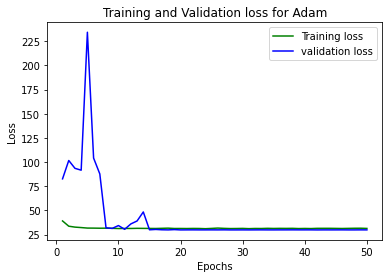

In [17]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss for Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
y_pred = model.predict(X_test)
print(y_pred)

4/4 [==============================] - 3s 3ms/step
[[153.84276  ]
 [139.19429  ]
 [ 57.211517 ]
 [111.5113   ]
 [111.24104  ]
 [126.13121  ]
 [121.16729  ]
 [ 95.274826 ]
 [119.901    ]
 [119.721664 ]
 [ 90.332016 ]
 [ 87.19435  ]
 [ 93.28754  ]
 [123.039955 ]
 [148.38484  ]
 [134.4788   ]
 [ 52.36517  ]
 [ 64.70228  ]
 [127.92745  ]
 [ 19.657246 ]
 [ 65.53322  ]
 [142.08308  ]
 [151.30177  ]
 [ 28.757582 ]
 [141.13475  ]
 [126.43053  ]
 [141.22414  ]
 [109.19618  ]
 [100.627396 ]
 [107.35507  ]
 [ 15.7656555]
 [ 60.206516 ]
 [112.482315 ]
 [  8.803218 ]
 [ 11.761944 ]
 [ 25.642853 ]
 [ 49.06641  ]
 [ 53.172684 ]
 [139.15842  ]
 [ 28.370113 ]
 [ 70.38962  ]
 [ 16.80953  ]
 [ 56.543533 ]
 [128.12032  ]
 [ 65.71008  ]
 [ 53.438545 ]
 [142.73203  ]
 [128.97859  ]
 [ 14.843633 ]
 [127.60085  ]
 [131.29614  ]
 [ 36.493256 ]
 [ 39.82647  ]
 [151.3214   ]
 [138.5529   ]
 [ 15.118859 ]
 [125.04013  ]
 [ 52.93606  ]
 [152.19118  ]
 [125.24897  ]
 [ 44.200783 ]
 [ 58.788403 ]
 [ 69.45023  ]
 [ 4

In [19]:
import sklearn

print(sklearn.metrics.r2_score(y_test, y_pred))
#print(sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred))
print(sklearn.metrics.mean_absolute_error(y_test, y_pred))

0.5954032128930392
19.436571102142334


In [21]:
!pip install autokeras

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [22]:
from autokeras import StructuredDataRegressor

In [23]:
search = StructuredDataRegressor(max_trials=15, loss='mean_absolute_error') #no of trial and errors allowed
search.fit(x=X_train, y=y_train, verbose=1) #fitting the model

Trial 15 Complete [00h 09m 12s]
val_loss: 38.27334213256836

Best val_loss So Far: 38.27334213256836
Total elapsed time: 00h 50m 14s
INFO:tensorflow:Oracle triggered exit
Epoch 1/152
645/645 [==============================] - 4s 6ms/step - loss: 107.6374 - mean_squared_error: 16327.9287
Epoch 2/152
645/645 [==============================] - 4s 6ms/step - loss: 107.2734 - mean_squared_error: 16254.2490
Epoch 3/152
645/645 [==============================] - 4s 6ms/step - loss: 106.8347 - mean_squared_error: 16162.4277
Epoch 4/152
645/645 [==============================] - 4s 6ms/step - loss: 106.2605 - mean_squared_error: 16039.3555
Epoch 5/152
645/645 [==============================] - 4s 6ms/step - loss: 105.4508 - mean_squared_error: 15861.1426
Epoch 6/152
645/645 [==============================] - 4s 6ms/step - loss: 104.2246 - mean_squared_error: 15581.3193
Epoch 7/152
645/645 [==============================] - 4s 6ms/step - loss: 102.2318 - mean_squared_error: 15104.2588
Epoch 8/15

645/645 [==============================] - 4s 6ms/step - loss: 30.5792 - mean_squared_error: 1890.5885
Epoch 71/152
645/645 [==============================] - 4s 6ms/step - loss: 30.5704 - mean_squared_error: 1890.0137
Epoch 72/152
645/645 [==============================] - 4s 6ms/step - loss: 30.5613 - mean_squared_error: 1889.2703
Epoch 73/152
645/645 [==============================] - 4s 7ms/step - loss: 30.5539 - mean_squared_error: 1888.5059
Epoch 74/152
645/645 [==============================] - 4s 6ms/step - loss: 30.5457 - mean_squared_error: 1887.9917
Epoch 75/152
645/645 [==============================] - 4s 6ms/step - loss: 30.5368 - mean_squared_error: 1887.1969
Epoch 76/152
645/645 [==============================] - 4s 6ms/step - loss: 30.5307 - mean_squared_error: 1886.1287
Epoch 77/152
645/645 [==============================] - 4s 6ms/step - loss: 30.5204 - mean_squared_error: 1885.6370
Epoch 78/152
645/645 [==============================] - 4s 6ms/step - loss: 30.5161 -

In [24]:
mae, acc = search.evaluate(X_test, y_test, verbose=1)

4/4 [==============================] - 0s 3ms/step - loss: 22.3890 - mean_squared_error: 893.4369


In [25]:
yhat = search.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [26]:
print(sklearn.metrics.r2_score(y_test, yhat))
#print(sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred))
print(sklearn.metrics.mean_absolute_error(y_test, yhat))

0.4826263253844316
22.38899380683899
